In [3]:
import pandas as pd

parallel_df = pd.read_csv("/projects/genomic-ml/da2343/ml_project_3/code/job_arrays_intermediate/parallel_n_row_time_df.csv")

non_parallel_df = pd.read_csv("/projects/genomic-ml/da2343/ml_project_3/code/job_arrays_intermediate/non_parallel_n_row_time_df.csv")

combined_df = pd.concat([parallel_df, non_parallel_df])

In [4]:
combined_df

,n_rows,mean_time,std_time,type
0,100,0.731504,0.023809,parallel
1,200,0.739913,0.007091,parallel
2,300,0.773622,0.000899,parallel
3,400,0.829519,0.002967,parallel
4,500,0.900955,0.010371,parallel
5,600,0.946319,0.003658,parallel
6,700,0.969743,0.002128,parallel
7,800,0.977382,0.006075,parallel
8,900,0.987482,0.017422,parallel
9,1000,0.977573,0.003713,parallel


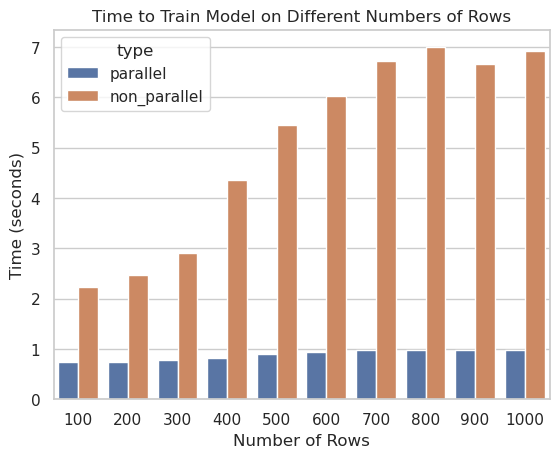

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

ax = sns.barplot(x="n_rows", y="mean_time", hue="type", data=combined_df)
ax.set(xlabel='Number of Rows', ylabel='Time (seconds)')
ax.set_title("Time to Train Model on Different Numbers of Rows")
# show plot
plt.show()
# plt.savefig("time_graph.png")


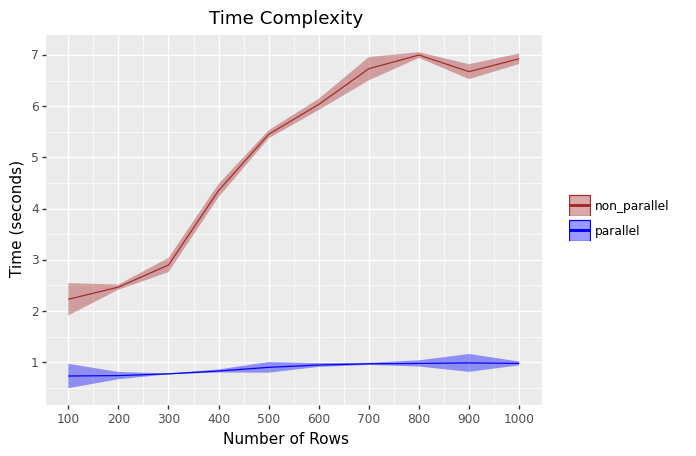

<ggplot: (1429632277541)>

In [41]:
import pandas as pd
from plotnine import *

# Data
data = {
    'n_rows': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000] * 2,
    'mean_time': [0.731504, 0.739913, 0.773622, 0.829519, 0.900955, 0.946319, 0.969743, 0.977382, 0.987482, 0.977573,
                  2.229276, 2.466633, 2.898244, 4.352738, 5.451303, 6.034871, 6.732228, 6.998254, 6.673621, 6.926072],
    'std_time': [0.023809, 0.007091, 0.000899, 0.002967, 0.010371, 0.003658, 0.002128, 0.006075, 0.017422, 0.003713,
                 0.031592, 0.005048, 0.013867, 0.012857, 0.007924, 0.010901, 0.022751, 0.005507, 0.014530, 0.010151],
    'type': ['parallel'] * 10 + ['non_parallel'] * 10
}

df = pd.DataFrame(data)

# Plotting with plotnine
p = (
    ggplot(df, aes(x='n_rows', y='mean_time', color='type')) +
    geom_line() +
    geom_ribbon(aes(ymin='mean_time-10*std_time', ymax='mean_time+10*std_time', fill='type' ), alpha=0.4, outline_type='none') +
    labs(title='Time Complexity', x='Number of Rows', y='Time (seconds)') +
    theme(
        legend_title=element_blank(),
        legend_key=element_blank(), # Add this line
    )+
    scale_x_continuous(breaks=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]) +
    scale_y_continuous(breaks=[0, 1, 2, 3, 4, 5, 6, 7, 8]) +
    scale_color_manual(values=['brown', 'blue']) +
    scale_fill_manual(values=['brown', 'blue'])
)
p


In [40]:
# save plot
ggsave(plot=p, filename='time_graph.png', dpi=1000, height=6, width=8, units='in', verbose=False)